In [1]:
%load_ext autoreload
%autoreload 2

In [55]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

from methods.paus import PAUS
from methods.mirror_prox import MirrorProx
from oracles.oracle import OperatorOracle
from oracles.point import OTProblemOracle
from utils.dataset import get_gaussian, load_mnist784, load_notMNIST_small
from utils.tm import get_2d_tm, get_1d_tm

In [12]:
np.random.seed(30)

# MNIST 784

In [91]:
letters = load_notMNIST_small("B")

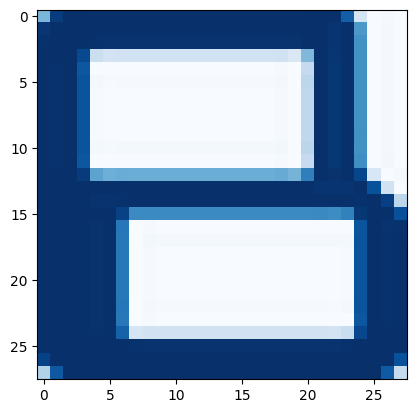

In [92]:
img = letters[0].reshape(28,28)

plt.imshow(img, cmap="Blues")

In [52]:
digits = load_mnist784(4)

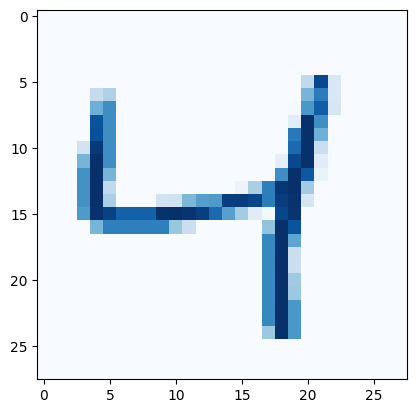

In [53]:
img = digits[0].reshape(28,28)

plt.imshow(img, cmap="Blues")

In [ ]:
d = len(digits[0])
d

# Gaussian

In [41]:
def get_method_gaussians(d: int, T: int, n: int) -> tuple[OperatorOracle, OperatorOracle, np.ndarray]:
    C = get_1d_tm(d)
    histograms, bar_true = get_gaussian(d, T)
    oracles = [OTProblemOracle(histograms[i], C) for i in range(T)]
    F, F1 = OperatorOracle(oracles, d, T), OperatorOracle(oracles, d, n)
    
    return F, F1, bar_true

In [84]:
d = 100
T = 10
n = T // 2
L = 2
max_iter = 10000
step_scale = 1.0

In [47]:
F, F1, bar_true = get_method_gaussians(d, T, n)

In [53]:
with open(f"reports/oracles/F_d={d}_T={T}_n={n}.pkl", "wb") as f:
    pickle.dump(F, f)
with open(f"reports/oracles/F1_d={d}_T={T}_n={n}.pkl", "wb") as f:
    pickle.dump(F1, f)
with open(f"reports/oracles/bar_true_d={d}_T={T}_n={n}.pkl", "wb") as f:
    pickle.dump(bar_true, f)

In [48]:
method = PAUS(F, F1, 1, 100, True, bar_true=bar_true)
delta = 2 * (T - n) / T
p_star, history = method.fit(delta, delta * step_scale, max_iter)

Iter: 0, Dual gap: 0.051067828307058576
Iter: 50, Dual gap: 0.050787836489182454
Iter: 100, Dual gap: 0.04945930692333775
Iter: 150, Dual gap: 0.047087816736602825
Iter: 200, Dual gap: 0.0441531582436647
Iter: 250, Dual gap: 0.04107023555638052
Iter: 300, Dual gap: 0.03805358657694625
Iter: 350, Dual gap: 0.03521414369633406
Iter: 400, Dual gap: 0.03262126469143785
Iter: 450, Dual gap: 0.030307775979987107
Iter: 500, Dual gap: 0.028267913533490563
Iter: 550, Dual gap: 0.02646734974419121
Iter: 600, Dual gap: 0.024867753720740973
Iter: 650, Dual gap: 0.023438176521189964
Iter: 700, Dual gap: 0.022158770568842925
Iter: 750, Dual gap: 0.021010865205075543
Iter: 800, Dual gap: 0.019974842324623654
Iter: 850, Dual gap: 0.01902982140012327
Iter: 900, Dual gap: 0.018160978992628668
Iter: 950, Dual gap: 0.017357741363707477
Iter: 1000, Dual gap: 0.016613500971303832
Iter: 1050, Dual gap: 0.015924489228993408
Iter: 1100, Dual gap: 0.015287757810531126
Iter: 1150, Dual gap: 0.014698836259498449


In [80]:
with open(f"reports/methods/paus_history_d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "wb") as f:
    pickle.dump(history, f)
with open(f"reports/methods/paus_p_star_d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "wb") as f:
    pickle.dump(p_star, f)

In [56]:
mirror_prox = MirrorProx(F, True, bar_true=bar_true)

In [85]:
mp_p_star, mp_history = mirror_prox.fit(L, 1 / L * step_scale, max_iter)

Iter: 0, Dual gap: 0.05106788551252059
Iter: 50, Dual gap: 0.049552691551915544
Iter: 100, Dual gap: 0.04425635357841785
Iter: 150, Dual gap: 0.03810809941318527
Iter: 200, Dual gap: 0.032660683630140755
Iter: 250, Dual gap: 0.028309830383561482
Iter: 300, Dual gap: 0.02491277240899102
Iter: 350, Dual gap: 0.02220486917648313
Iter: 400, Dual gap: 0.020022846516988692
Iter: 450, Dual gap: 0.018208676527079568
Iter: 500, Dual gap: 0.01665889185752143
Iter: 550, Dual gap: 0.015330225026752351
Iter: 600, Dual gap: 0.014194237411428926
Iter: 650, Dual gap: 0.013211974263019668
Iter: 700, Dual gap: 0.012347869164991953
Iter: 750, Dual gap: 0.011580224692473799
Iter: 800, Dual gap: 0.010893521630854006
Iter: 850, Dual gap: 0.01027275420278743
Iter: 900, Dual gap: 0.009717502774665985
Iter: 950, Dual gap: 0.009215770219702839
Iter: 1000, Dual gap: 0.008751791595172356
Iter: 1050, Dual gap: 0.008331910770566822
Iter: 1100, Dual gap: 0.007958483798293574
Iter: 1150, Dual gap: 0.00761748746137959

In [86]:
with open(f"reports/methods/mirror-prox_history_d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "wb") as f:
    pickle.dump(mp_history, f)
with open(f"reports/methods/mirror-prox_p_star_d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "wb") as f:
    pickle.dump(mp_p_star, f)

In [ ]:
max_iter

In [ ]:
d, T, n, step_scale

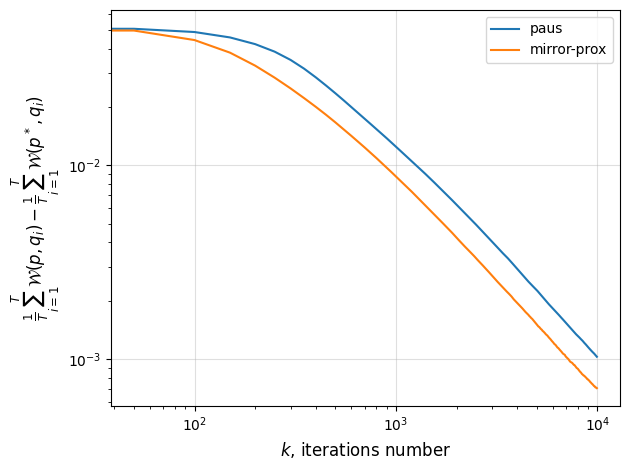

In [87]:
for method_name in ["paus", "mirror-prox"]:
    with open(f"reports/methods/{method_name}_history_d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "rb") as f:
        history = pickle.load(f)
    plt.loglog(history["iter"], history["dual_gap"], label=method_name)
#plt.loglog(mp_history["iter"], mp_history["dual_gap"], label='Mirror-Prox')
plt.ylabel(r'$\frac{1}{T}\sum_{i=1}^T\mathcal{W}(p,q_i) -\frac{1}{T}\sum_{i=1}^T\mathcal{W}(p^*,q_i)$', fontsize=12)

plt.xlabel('$k$, iterations number', fontsize=12)

plt.grid(alpha=0.4)
# plt.title(r"Entropy Regularized, $\dfrac{1}{\varepsilon}$="+str(int(1/eps)), fontsize=16)
# plt.title(r"Entropy Regularized, $\varepsilon$="+f"{eps:.5f}", fontsize=16)
plt.legend()
plt.tight_layout()

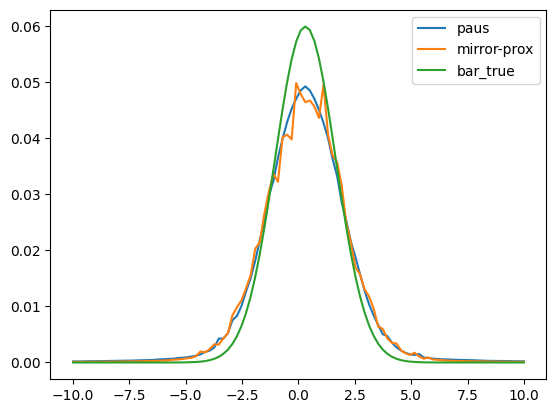

In [89]:
x = np.linspace(-10, 10, 100)
# for gamma_scale in [0.1, 0.01]:#, 10.0]:
#     with open(f"paus_gaussian_z_{gamma_scale}.pkl", "rb") as f:
#         z = pickle.load(f)
#         print(gamma_scale, z.p.sum())
#     plt.plot(x, z.p, label=f'{gamma_scale:.2f}')

# with open(f"paus_gaussian_z.pkl", "rb") as f:
#     z = pickle.load(f)
#     print(1, z.p.sum())
for method_name in ["paus", "mirror-prox"]:
    with open(f"reports/methods/{method_name}_p_star_d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "rb") as f:
        p_star = pickle.load(f)
    plt.plot(x, p_star, label=method_name)

# with open(f"paus_gaussian_bartrue.pkl", "rb") as f:
#     p = pickle.load(f)
plt.plot(x, bar_true, label='bar_true')
plt.legend()